# Data-Driven Insights into 2024-25 Fantasy Premier League | Thoughts and Findings

## Introduction

In [3]:
# Loading Data / packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOCAL_DATA_DIR = "archive_data/2024-25"
LOCAL_PLAYER_FILE = "player_summaries.csv"
LOCAL_PLAYER_PATH = os.path.join(LOCAL_DATA_DIR, LOCAL_PLAYER_FILE)
df_player_summary = pd.read_csv(LOCAL_PLAYER_PATH)

# Filtering & Column Modifying - Init graphs
df_player_summary1 = df_player_summary[df_player_summary['minutes'] > 1000].copy() # Players with over 1000 minutes
df_player_summary2 = df_player_summary1.copy()
df_player_summary2['cost_in_m'] = df_player_summary1['now_cost']/10 # Cost in Mil £
df_player_summary2['points_per_mil'] = df_player_summary2['total_points']/df_player_summary2['cost_in_m'] # Points Per Mil £
position_map = { # Position Names
    1: 'GK',
    2: 'DEF',
    3: 'MID',
    4: 'FWD'}
df_player_summary2['position'] = df_player_summary2['element_type'].map(position_map)
desired_order_pos = ['GK', 'DEF', 'MID', 'FWD']
df_player_summary2['position'] = pd.Categorical(
    df_player_summary2['position'],
    categories=desired_order_pos,
    ordered=True) # Setting order for positional comparisions

# Correlations Set-up
df_corr_data = df_player_summary2.copy()
df_corr_data = df_corr_data[df_corr_data['element_type'] > 1]
correlation_stats = [
    'total_points',
    'minutes',    
    'points_per_game',
    'cost_in_m',
    'points_per_mil',
    
    'goals_scored',
    'assists',
    'clean_sheets',
    'goals_conceded',

    'bonus',
    'bps',
      
    'ict_index',
    'creativity',
    'influence',
    'threat',

    'expected_goals_per_90',
    'expected_assists_per_90',
    'expected_goal_involvements_per_90']
corr_dat_plot = df_corr_data[correlation_stats].copy()
corr_matrix = corr_dat_plot.corr()

### Project Overview

Fantasy Premier League, or FPL for short, allows for players worldwide to build a virtual team of Premier League talent. Points are provided based on players' real world performances, and consistent success often hinges on making informed decisions, as opposed through playing via 'gut' feelings.
This report presents an Exploratory Data Analysis (EDA),  from comprehensive data throughout the 2024-25 season (sourced from Vaastav's github repo), providing an overview of several key areas including price, performance and key position metrics.

### Methodology

#### Pulling Data

Initally when I set out the project, I built 00_Data_Loading.ipynb. This notebook shifts through the premier league's API, downloading data for the season and individual player stats. With the upcoming season however, the API will soon shift to be blank, and will become populated with data for the 25-26 season. As this will be a static, reflective report on the season already passed, I shifted data loading strategy.
I instead loaded CSV's from Vaastav's github repo (https://github.com/vaastav/Fantasy-Premier-League/tree/master/data/2024-25).
This included, raw_players.csv - For overall player information and the csvs for each gameweek, in gws, for weekly data.

#### Data Processing

Inside 01_Data_Processing.ipynb, I merged the individual gameweek csvs, into one single master csv, containing all data for all players each week.
To accomplish this step, I had to add Na values into some select stat columns that only appeared midway through the season (due to a feature released mid-year). 
As such, the gameweek csvs between the first and second half had to be matched up before they could be concatenated.

To load and process the data from github, Pandas was utilised, primarily its 'read_csv' and 'to_csv' functions. some path tools from os, and time when looping through github requests were also used.

#### Data Refinement

Within 02_EDA, the data was initially loaded from its local save.
To begin some sample information was viewed for the datasets. 
.info(), checks for missing values, an overview of column names and a sample few rows were all displayed.
Some column filtering preceded a filtering of players who only played a sizeable level of minutes. In my analysis, I used players who played more than 1000 minutes of league football, (or roughly ~10 games), about a quarter of the available minutes in the season. 

This EDA utilised the following packages:
- Pandas for Data Wrangling
- Matplotlib and Seaborn for graphics.

## Findings

### Cost vs Points

Starting with essentially the two most key statistics in fantasy football, Cost and Points. It is inherently assumed that more expensive players = better players = more points. 
However, just like in transfer fees for the real game, the price of players doesn't guarantee results. 
This jointplot maps players between their final cost ingame, and their total points tallies for the season. 


--- Player Final Cost vs Total Points Scored ---


<Figure size 1000x1000 with 0 Axes>

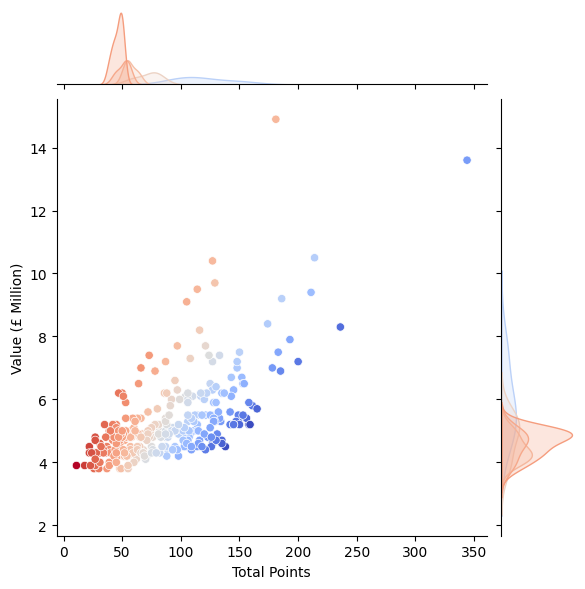

In [5]:
## Player Final Cost vs Total Points Scored
print("\n--- Player Final Cost vs Total Points Scored ---")
plt.figure(figsize=(10, 10))
sns.jointplot(x='total_points', y='cost_in_m', data=df_player_summary2, palette='coolwarm_r', hue='points_per_mil', legend=False)
plt.ylabel('Value (£ Million)')
plt.xlabel('Total Points')
plt.show()

Clearly seen through the colouring, there is bargins to be had with a sizable collection of players scoring in the mid 100's for total points, with darker blue players returning a better size of points compared to the millions invested in them.
So the question becomes, what players are providing this value? And what metrics of theirs can be used to identify them during, or prior to another season?

### Points Per Million

Points Per Million represents the ultimate value stat for budgeting managers. Maximising return on tight budgets means freeing up money for high scoring, expensive assest (Salah), while accumulating points at a steady rate throughout the season.
This graph identifies the players on the best return for each million invested.


--- Top 20 Points Scorers for 2024-25 ---


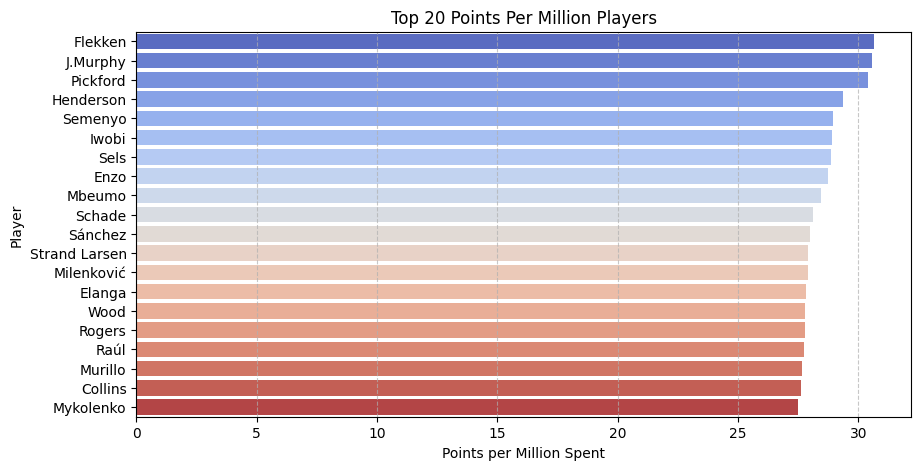

In [11]:
## Top 20 Points Per Million Players
print("\n--- Top 20 Points Scorers for 2024-25 ---")
top_20_ppm = df_player_summary2.sort_values(by='points_per_mil', ascending=False)[:20]
plt.figure(figsize=(10, 5))
sns.barplot(data=top_20_ppm, x='points_per_mil', y='web_name', palette='coolwarm', hue='web_name', legend=False)
plt.title("Top 20 Points Per Million Players")
plt.ylabel('Player')
plt.xlabel('Points per Million Spent')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

- Comments on top 20 players

### Positional Comparison

With each player being seperated into one of the games conforming roles, Forwards, Midfielders, Defenders or 'Keepers, where and how to invest the bulk of your budget becomes a key consideration for a manager.


--- PPG Per Position ---


Text(0, 0.5, 'Points Per Game')

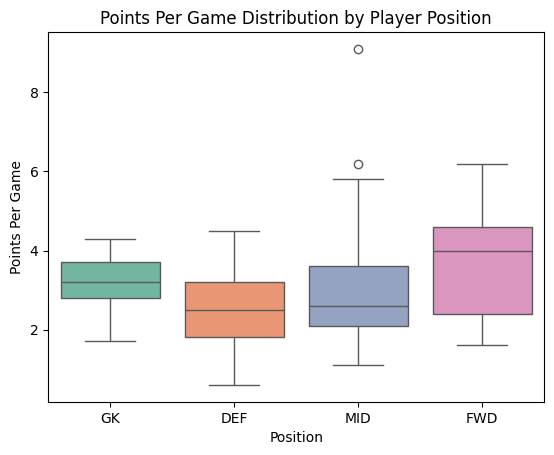

In [12]:
## PPG By Position
print("\n--- PPG Per Position ---")
plt.Figure(figsize=(10,8))
sns.boxplot(data=df_player_summary2, 
            x='position', 
            y='points_per_game',
            palette='Set2',
            hue='position',
            legend=False)
plt.title('Points Per Game Distribution by Player Position')
plt.xlabel('Position')
plt.ylabel('Points Per Game')

The boxplot shows a high median for the forward position with a large spread, and minus the two outliers in midfield (Salah and Mbeumo), it initially suggests that a strategy more heavily invested in forwards could be rewarding.


--- PPM Per Position ---


Text(0, 0.5, 'Points Per Million £')

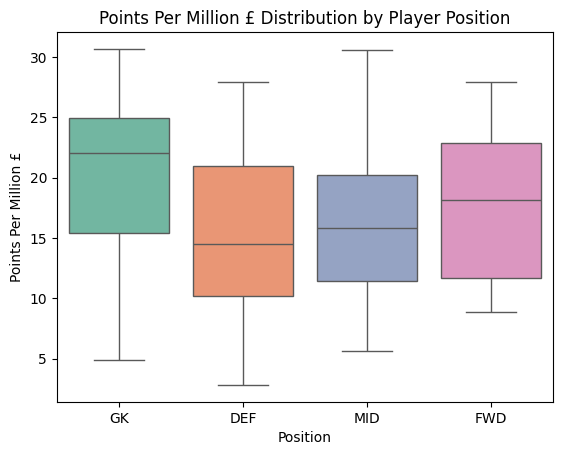

In [13]:
## PPM By Position
print("\n--- PPM Per Position ---")
plt.Figure(figsize=(10,8))
sns.boxplot(data=df_player_summary2, 
            x='position', 
            y='points_per_mil',
            palette='Set2',
            hue='position',
            legend=False)
plt.title('Points Per Million £ Distribution by Player Position')
plt.xlabel('Position')
plt.ylabel('Points Per Million £')

On further analysis costs also suggest that Forwards are a relatively safe purchase. While they lack the ceiling reached in terms of value compared to Midfield or Goalkeepers, the distribution of points per mil is far smaller than other positions. Therefore they indicate a lower risk investment, and the collective group of players as a whole outperform other positions. Investing long term in a forward suggests that you should be recieving at least, nearly 10 points per million invested, compared to potentials points half of that or less in other areas.

### Correlations

Comparing some select stats in a correlation matrix allows for stats that link together nicely to become easily identified, with links beyond what may initially appear obvious. Stats that both increase in sync will receive a correlation coefficient of 1, while stats that have no apparent relation will receive a score close to 0. Stats that have an inverse relationship (As one increases, the other decreases) will have scores approaching -1.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'total_points'),
  Text(1.5, 0, 'minutes'),
  Text(2.5, 0, 'points_per_game'),
  Text(3.5, 0, 'cost_in_m'),
  Text(4.5, 0, 'points_per_mil'),
  Text(5.5, 0, 'goals_scored'),
  Text(6.5, 0, 'assists'),
  Text(7.5, 0, 'clean_sheets'),
  Text(8.5, 0, 'goals_conceded'),
  Text(9.5, 0, 'bonus'),
  Text(10.5, 0, 'bps'),
  Text(11.5, 0, 'ict_index'),
  Text(12.5, 0, 'creativity'),
  Text(13.5, 0, 'influence'),
  Text(14.5, 0, 'threat'),
  Text(15.5, 0, 'expected_goals_per_90'),
  Text(16.5, 0, 'expected_assists_per_90'),
  Text(17.5, 0, 'expected_goal_involvements_per_90')])

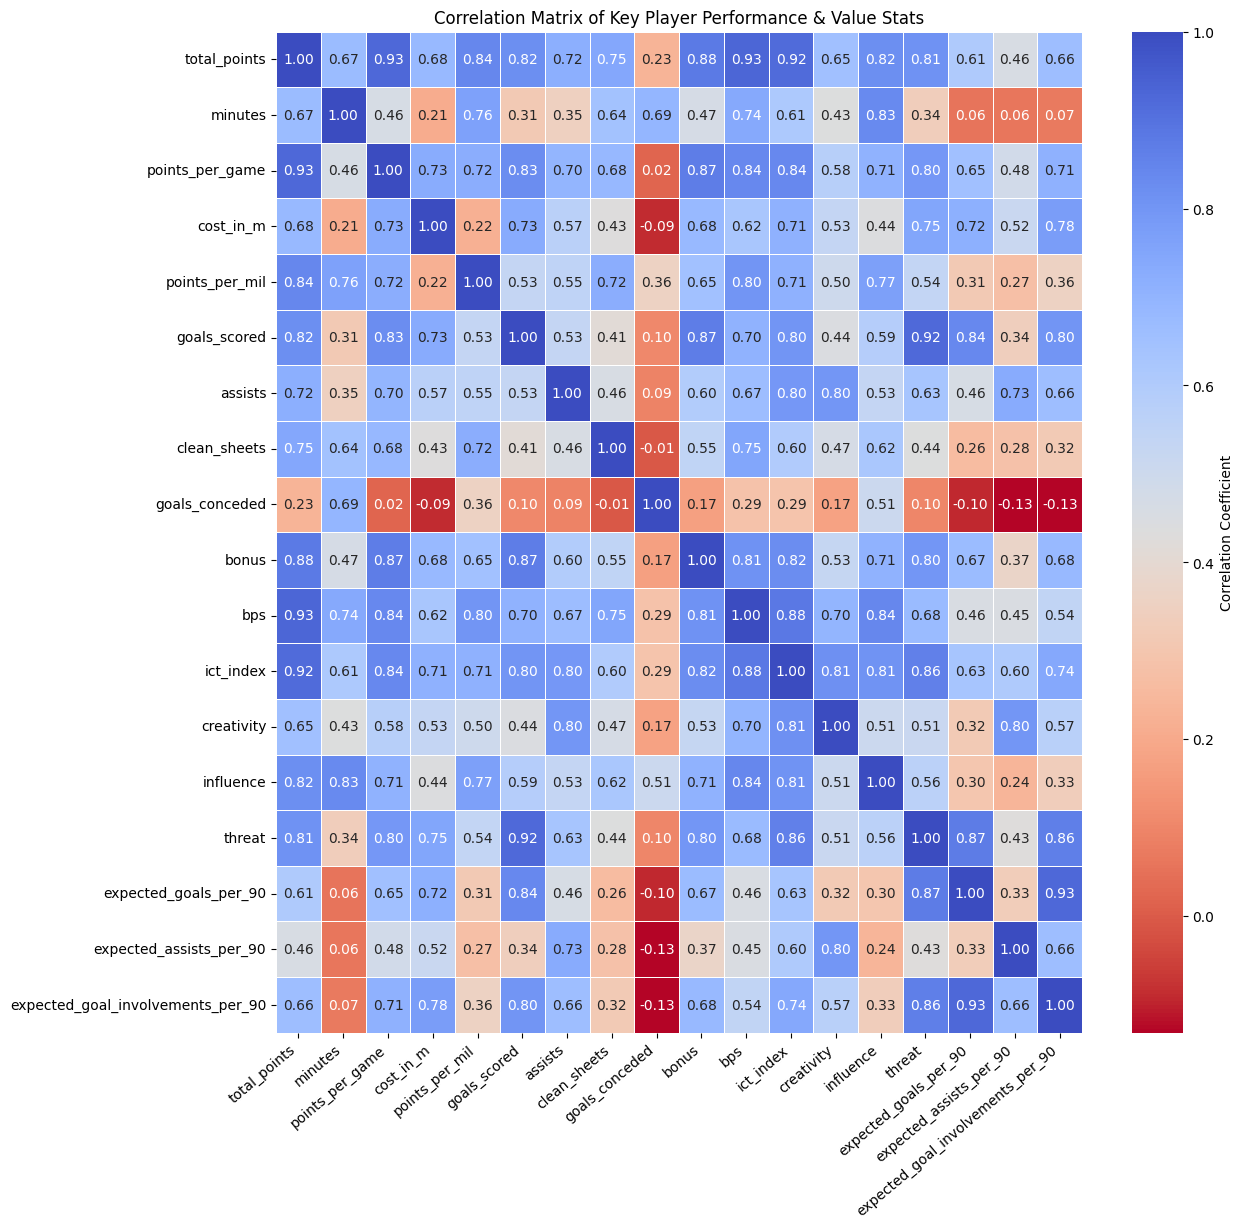

In [14]:
## Correlation Matrix
plt.figure(figsize=(13,13,))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm_r',
    fmt=".2f",
    linewidths=.7,
    cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Key Player Performance & Value Stats')
plt.xticks(rotation=40, ha='right')

Some intial correlations that appear interesting are the links between the bps, or Bonus Points System, a score given to each player during the match based off of efforts, with the top scorers being awarded 3, 2, and 1 'bonus' points. The stats suggest that the players that consistently score highly in this system align closely with actual points scored.
Alongside that, the ICT index, (scores for Influence, Creativity and Threat) also aligns closely with total points, moreso than any of its three components, suggesting that players with the right balance of the three can again, consistently score points.
For more budget players, points_per_mil corresponding not just the ICT index, but with one metric, influence, in particular. Alongside that, clean sheets appear to contribute moreso to the total points of budget options.

## Thoughts

When building a team, managers have to balance between premium, high scoring assests and budget options to fill out the team. 
From the correlational analysis, when identifying plays for raw points output, managers would do well to carefully review the players ability to score in the bonus points system, alongside their overall ICT index rating.
When choosing a more budget-orientated player, attention towards a team capable of defending well, picking up clean sheets, will see a better return on investment, while attacking, budget players should in particular be focused on the influence aspect of an ICT index review.

## Next

Future additions to the report will hopefully include:
- Fixture Difficulty analysis, how points scored changes depending on the opposition.
- Team analysis, how the team of a player impacts their performance/scores.
- ML to aid in team assembly.

To aid in the 2025-26 season, data from 00_Data_Loading will be set up to sync to a google drive, allowing for data storage and use during the season, and beyond.  